In [1]:
api_key = "25cb71a9f1f29bfb95e5754dac5d18eac4375612"

In [2]:
cities_coordinates = {
    'Montgomery, AL': (32.3792, -86.3077),
    'Juneau, AK': (58.3019, -134.4197),
    'Phoenix, AZ': (33.4484, -112.0740),
    'Little Rock, AR': (34.7465, -92.2896),
    'Sacramento, CA': (38.5816, -121.4944),
    'Denver, CO': (39.7392, -104.9903),
    'Hartford, CT': (41.7658, -72.6734),
    'Dover, DE': (39.1582, -75.5244),
    'Tallahassee, FL': (30.4383, -84.2807),
    'Atlanta, GA': (33.7490, -84.3880),
    'Honolulu, HI': (21.3069, -157.8583),
    'Boise, ID': (43.6150, -116.2023),
    'Springfield, IL': (39.7817, -89.6501),
    'Indianapolis, IN': (39.7684, -86.1581),
    'Des Moines, IA': (41.5868, -93.6250),
    'Topeka, KS': (39.0473, -95.6752),
    'Frankfort, KY': (38.2009, -84.8733),
    'Baton Rouge, LA': (30.4515, -91.1871),
    'Augusta, ME': (44.3106, -69.7795),
    'Annapolis, MD': (38.9784, -76.4922),
    'Boston, MA': (42.3601, -71.0589),
    'Lansing, MI': (42.7325, -84.5555),
    'St. Paul, MN': (44.9537, -93.0900),
    'Jackson, MS': (32.2988, -90.1848),
    'Jefferson City, MO': (38.5767, -92.1735),
    'Helena, MT': (46.5891, -112.0391),
    'Lincoln, NE': (40.8136, -96.7026),
    'Carson City, NV': (39.1638, -119.7674),
    'Concord, NH': (43.2081, -71.5376),
    'Trenton, NJ': (40.2206, -74.7597),
    'Santa Fe, NM': (35.6869, -105.9378),
    'Albany, NY': (42.6526, -73.7562),
    'Raleigh, NC': (35.7796, -78.6382),
    'Bismarck, ND': (46.8083, -100.7837),
    'Columbus, OH': (39.9612, -82.9988),
    'Oklahoma City, OK': (35.4676, -97.5164),
    'Salem, OR': (44.9429, -123.0351),
    'Harrisburg, PA': (40.2732, -76.8867),
'Providence, RI': (41.8240, -71.4128),
'Columbia, SC': (34.0007, -81.0348),
'Pierre, SD': (44.3669, -100.3538),
'Nashville, TN': (36.1627, -86.7816),
'Austin, TX': (30.2672, -97.7431),
'Salt Lake City, UT': (40.7608, -111.8910),
'Montpelier, VT': (44.2601, -72.5754),
'Richmond, VA': (37.5407, -77.4360),
'Olympia, WA': (47.0379, -122.9007),
'Charleston, WV': (38.3498, -81.6326),
'Madison, WI': (43.0731, -89.4012),
'New York City, NY':(40.7128, -74.0060)
}


In [3]:
import requests
import json

API_KEY = '25cb71a9f1f29bfb95e5754dac5d18eac4375612'
BASE_URL = 'https://api.waqi.info'
POLLUTANTS = ['pm25', 'no2', 'o3']

def get_air_quality_data_by_coordinates(api_key, lat, lng):
    url = f'{BASE_URL}/feed/geo:{lat};{lng}/?token={api_key}'
    response = requests.get(url)

    if response.status_code == 200:
        data = json.loads(response.text)
        return data
    else:
        print(f"Error: {response.status_code}")
        return None

def extract_pollutants_data(raw_data, pollutants):
    if raw_data and 'data' in raw_data and 'iaqi' in raw_data['data']:
        iaqi_data = raw_data['data']['iaqi']
        extracted_data = {}
        for pollutant in pollutants:
            if pollutant in iaqi_data:
                extracted_data[pollutant] = iaqi_data[pollutant]['v']
        return extracted_data
    return None

usa_pollutants_data = {}

for city, coordinates in cities_coordinates.items():
    lat, lng = coordinates
    raw_data = get_air_quality_data_by_coordinates(API_KEY, lat, lng)
    pollutants_data = extract_pollutants_data(raw_data, POLLUTANTS)
    if pollutants_data:
        usa_pollutants_data[city] = pollutants_data
with open('usa_pollutants_data.json', 'w') as outfile:
    json.dump(usa_pollutants_data, outfile, indent=2)

print(json.dumps(usa_pollutants_data, indent=2))



{
  "Montgomery, AL": {
    "pm25": 17,
    "o3": 18.4
  },
  "Juneau, AK": {
    "pm25": 39
  },
  "Phoenix, AZ": {
    "pm25": 13,
    "no2": 4.7,
    "o3": 32.8
  },
  "Little Rock, AR": {
    "pm25": 18,
    "o3": 8
  },
  "Sacramento, CA": {
    "pm25": 25,
    "o3": 20.8
  },
  "Denver, CO": {
    "pm25": 9,
    "no2": 4.2,
    "o3": 14.3
  },
  "Hartford, CT": {
    "pm25": 14,
    "no2": 3.4
  },
  "Dover, DE": {
    "pm25": 13,
    "o3": 13.6
  },
  "Tallahassee, FL": {
    "pm25": 22,
    "o3": 9
  },
  "Atlanta, GA": {
    "pm25": 7,
    "o3": 21.6
  },
  "Honolulu, HI": {
    "pm25": 14
  },
  "Boise, ID": {
    "pm25": 9,
    "no2": 17.6,
    "o3": 48.1
  },
  "Springfield, IL": {
    "pm25": 35
  },
  "Indianapolis, IN": {
    "pm25": 28,
    "no2": 9.2,
    "o3": 21.6
  },
  "Des Moines, IA": {
    "pm25": 34,
    "o3": 10.4
  },
  "Topeka, KS": {
    "pm25": 11,
    "o3": 20
  },
  "Frankfort, KY": {
    "pm25": 17,
    "o3": 11.2
  },
  "Baton Rouge, LA": {
    "pm25":

In [4]:
import plotly.express as px
import random

def random_offset():
    return random.uniform(-0.05, 0.05)
locations = []
latitudes = []
longitudes = []
dominant_pollutants = []
max_values = []
mapbox_access_token = 'sk.eyJ1IjoibmVoYWdhbGxhIiwiYSI6ImNsaDJ3MWV0aTBtcG0zcHFyazltMDExeXcifQ.i_9UpxF1tm3EQ93VAX1_1g'

for city, coordinates in cities_coordinates.items():
    lat, lng = coordinates
    lat += random_offset()
    lng += random_offset()
    if city in usa_pollutants_data:
        max_pollutant = None
        max_value = 0
        for pollutant, value in usa_pollutants_data[city].items():
            if value > max_value:
                max_value = value
                max_pollutant = pollutant.upper()

        locations.append(f'{city} ({max_pollutant})')
        latitudes.append(lat)
        longitudes.append(lng)
        dominant_pollutants.append(max_pollutant)
        max_values.append(max_value)

data = {
    'Location': locations,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Dominant Pollutant': dominant_pollutants,
    'Pollutant Value': max_values
}

fig = px.scatter_mapbox(
    data,
    lat='Latitude',
    lon='Longitude',
    color='Dominant Pollutant',
    color_discrete_map={
        'PM2.5': 'red',
        'NO2': 'blue',
        'O3': 'green'
    },
    zoom=3,
    text='Location',
    hover_name='Location',
    hover_data=['Pollutant Value'],
    title='Air Quality in Major Cities in USA',
    mapbox_style='carto-positron',
    height=600
)
fig.update_layout(mapbox_accesstoken=mapbox_access_token)
fig.show()


In [5]:
city_to_state_mapping = {
    'Montgomery, AL': 'Alabama',
    'Juneau, AK': 'Alaska',
    'Phoenix, AZ': 'Arizona',
    'Little Rock, AR': 'Arkansas',
    'Sacramento, CA': 'California',
    'Denver, CO': 'Colorado',
    'Hartford, CT': 'Connecticut',
    'Dover, DE': 'Delaware',
    'Tallahassee, FL': 'Florida',
    'Atlanta, GA': 'Georgia',
    'Honolulu, HI': 'Hawaii',
    'Boise, ID': 'Idaho',
    'Springfield, IL': 'Illinois',
    'Indianapolis, IN': 'Indiana',
    'Des Moines, IA': 'Iowa',
    'Topeka, KS': 'Kansas',
    'Frankfort, KY': 'Kentucky',
    'Baton Rouge, LA': 'Louisiana',
    'Augusta, ME': 'Maine',
    'Annapolis, MD': 'Maryland',
    'Boston, MA': 'Massachusetts',
    'Lansing, MI': 'Michigan',
    'St. Paul, MN': 'Minnesota',
    'Jackson, MS': 'Mississippi',
    'Jefferson City, MO': 'Missouri',
    'Helena, MT': 'Montana',
    'Lincoln, NE': 'Nebraska',
    'Carson City, NV': 'Nevada',
    'Concord, NH': 'New Hampshire',
    'Trenton, NJ': 'New Jersey',
    'Santa Fe, NM': 'New Mexico',
    'Albany, NY': 'New York',
    'Raleigh, NC': 'North Carolina',
    'Bismarck, ND': 'North Dakota',
    'Columbus, OH': 'Ohio',
    'Oklahoma City, OK': 'Oklahoma',
    'Salem, OR': 'Oregon',
    'Harrisburg, PA': 'Pennsylvania',
    'Providence, RI': 'Rhode Island',
    'Columbia, SC': 'South Carolina',
    'Pierre, SD': 'South Dakota',
    'Nashville, TN': 'Tennessee',
    'Austin, TX': 'Texas',
    'Salt Lake City, UT': 'Utah',
    'Montpelier, VT': 'Vermont',
    'Richmond, VA': 'Virginia',
    'Olympia, WA': 'Washington',
    'Charleston, WV': 'West Virginia',
    'Madison, WI': 'Wisconsin',
    'New York City, NY': 'New York',
    'Cheyenne, WY': 'Wyoming',
}


In [9]:
import plotly.graph_objs as go
from urllib.request import urlopen
import json
import pandas as pd


with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    states_geojson = json.load(response)
df = pd.DataFrame(columns=['State', 'City', 'Pollutant', 'Value'])
for city, pollutants in usa_pollutants_data.items():
    state = city_to_state_mapping[city]
    for pollutant, value in pollutants.items():
        # df = df.append({'State': state, 'City': city, 'Pollutant': pollutant, 'Value': value}, ignore_index=True)
        df = pd.concat([df, pd.DataFrame([{'State': state, 'City': city, 'Pollutant': pollutant, 'Value': value}])], ignore_index=True)

state_id_mapping = {}
for feature in states_geojson['features']:
    state_id_mapping[feature['properties']['name']] = feature['id']
df['ID'] = df['State'].map(state_id_mapping)


df_list = []
for city, pollutants in usa_pollutants_data.items():
    state = city_to_state_mapping[city]
    for pollutant, value in pollutants.items():
        temp_df = pd.DataFrame({'State': [state], 'City': [city], 'Pollutant': [pollutant], 'Value': [value]})
        df_list.append(temp_df)


df = pd.concat(df_list, ignore_index=True)

df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

df_state = df.groupby(['State', 'Pollutant'])['Value'].mean().reset_index()

df_state['ID'] = df_state['State'].map(state_id_mapping)

pollutants = ['pm25', 'no2', 'o3']
colorscale = [
    [0.0, 'green'],
    [0.5, 'orange'],
    [1.0, 'red']
]


for pollutant in pollutants:
    fig = go.Figure(go.Choroplethmapbox(
        geojson=states_geojson,
        locations=df_state[df_state['Pollutant'] == pollutant]['ID'],
        z=df_state[df_state['Pollutant'] == pollutant]['Value'],
        colorscale=colorscale,
        zmin=0,
        zmax=df_state[df_state['Pollutant'] == pollutant]['Value'].max(),
        marker_opacity=0.5,
        marker_line_width=0,
        text=df_state[df_state['Pollutant'] == pollutant]['State'],
        hovertemplate='%{text}<br>' + pollutant + ': %{z}<extra></extra>'
    ))

    fig.update_layout(
        mapbox_style='carto-positron',
        mapbox_zoom=3,
        mapbox_center={'lat': 37.0902, 'lon': -95.7129},
        margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
        title={'text': f"{pollutant} Pollution in US States", 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'}
    )

    fig.show()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd


years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
files = ['/content/drive/MyDrive/Info Viz/Historical Air Pollution data USA/report2011.xlsx',
         '/content/drive/MyDrive/Info Viz/Historical Air Pollution data USA/report2012.xlsx',
         '/content/drive/MyDrive/Info Viz/Historical Air Pollution data USA/report2013.xlsx',
         '/content/drive/MyDrive/Info Viz/Historical Air Pollution data USA/report2014.xlsx',
         '/content/drive/MyDrive/Info Viz/Historical Air Pollution data USA/report2015.xlsx',
         '/content/drive/MyDrive/Info Viz/Historical Air Pollution data USA/report2016.xlsx',
         '/content/drive/MyDrive/Info Viz/Historical Air Pollution data USA/report2017.xlsx',
         '/content/drive/MyDrive/Info Viz/Historical Air Pollution data USA/report2018.xlsx',
         '/content/drive/MyDrive/Info Viz/Historical Air Pollution data USA/report2019.xlsx',
         '/content/drive/MyDrive/Info Viz/Historical Air Pollution data USA/report2020.xlsx',
         '/content/drive/MyDrive/Info Viz/Historical Air Pollution data USA/report2021.xlsx']


combined_data = pd.DataFrame()
dataframes = []
for year, file in zip(years, files):
    data = pd.read_excel(file, engine='openpyxl')
    data['Year'] = year
    dataframes.append(data)

combined_data = pd.concat(dataframes, ignore_index=True)


In [12]:
combined_data.replace(".", float("NaN"), inplace=True)


no2_mean_data = combined_data[['Year', 'CBSA', 'NO2 Mean 1-hr']]
ozone_max_data = combined_data[['Year', 'CBSA', 'Ozone 4th Max 8-hr']]
pm25_weighted_mean_data = combined_data[['Year', 'CBSA', 'PM2.5 Weighted Mean 24-hr']]


no2_mean_heatmap = no2_mean_data.pivot_table(index='CBSA', columns='Year', values='NO2 Mean 1-hr')
ozone_max_heatmap = ozone_max_data.pivot_table(index='CBSA', columns='Year', values='Ozone 4th Max 8-hr')
pm25_weighted_mean_heatmap = pm25_weighted_mean_data.pivot_table(index='CBSA', columns='Year', values='PM2.5 Weighted Mean 24-hr')


/tmp/ipython-input-1505274971.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



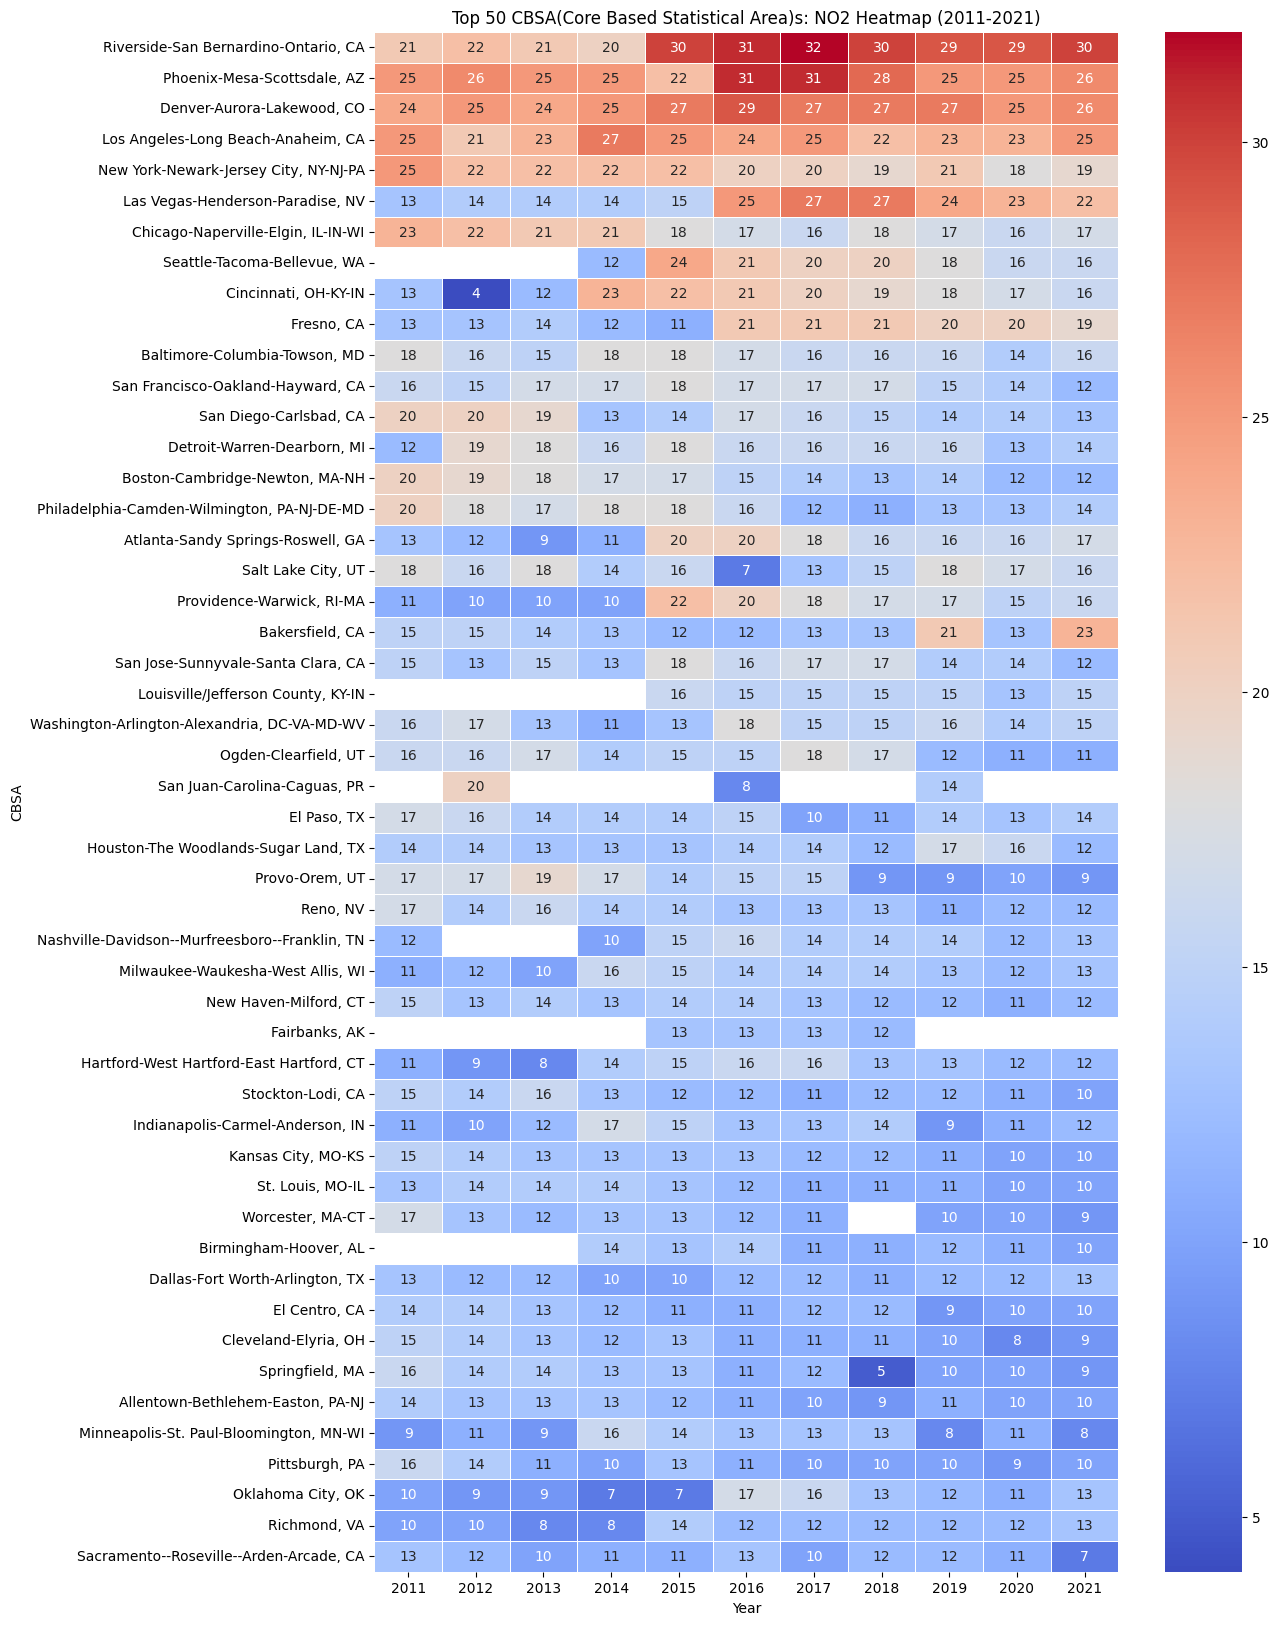

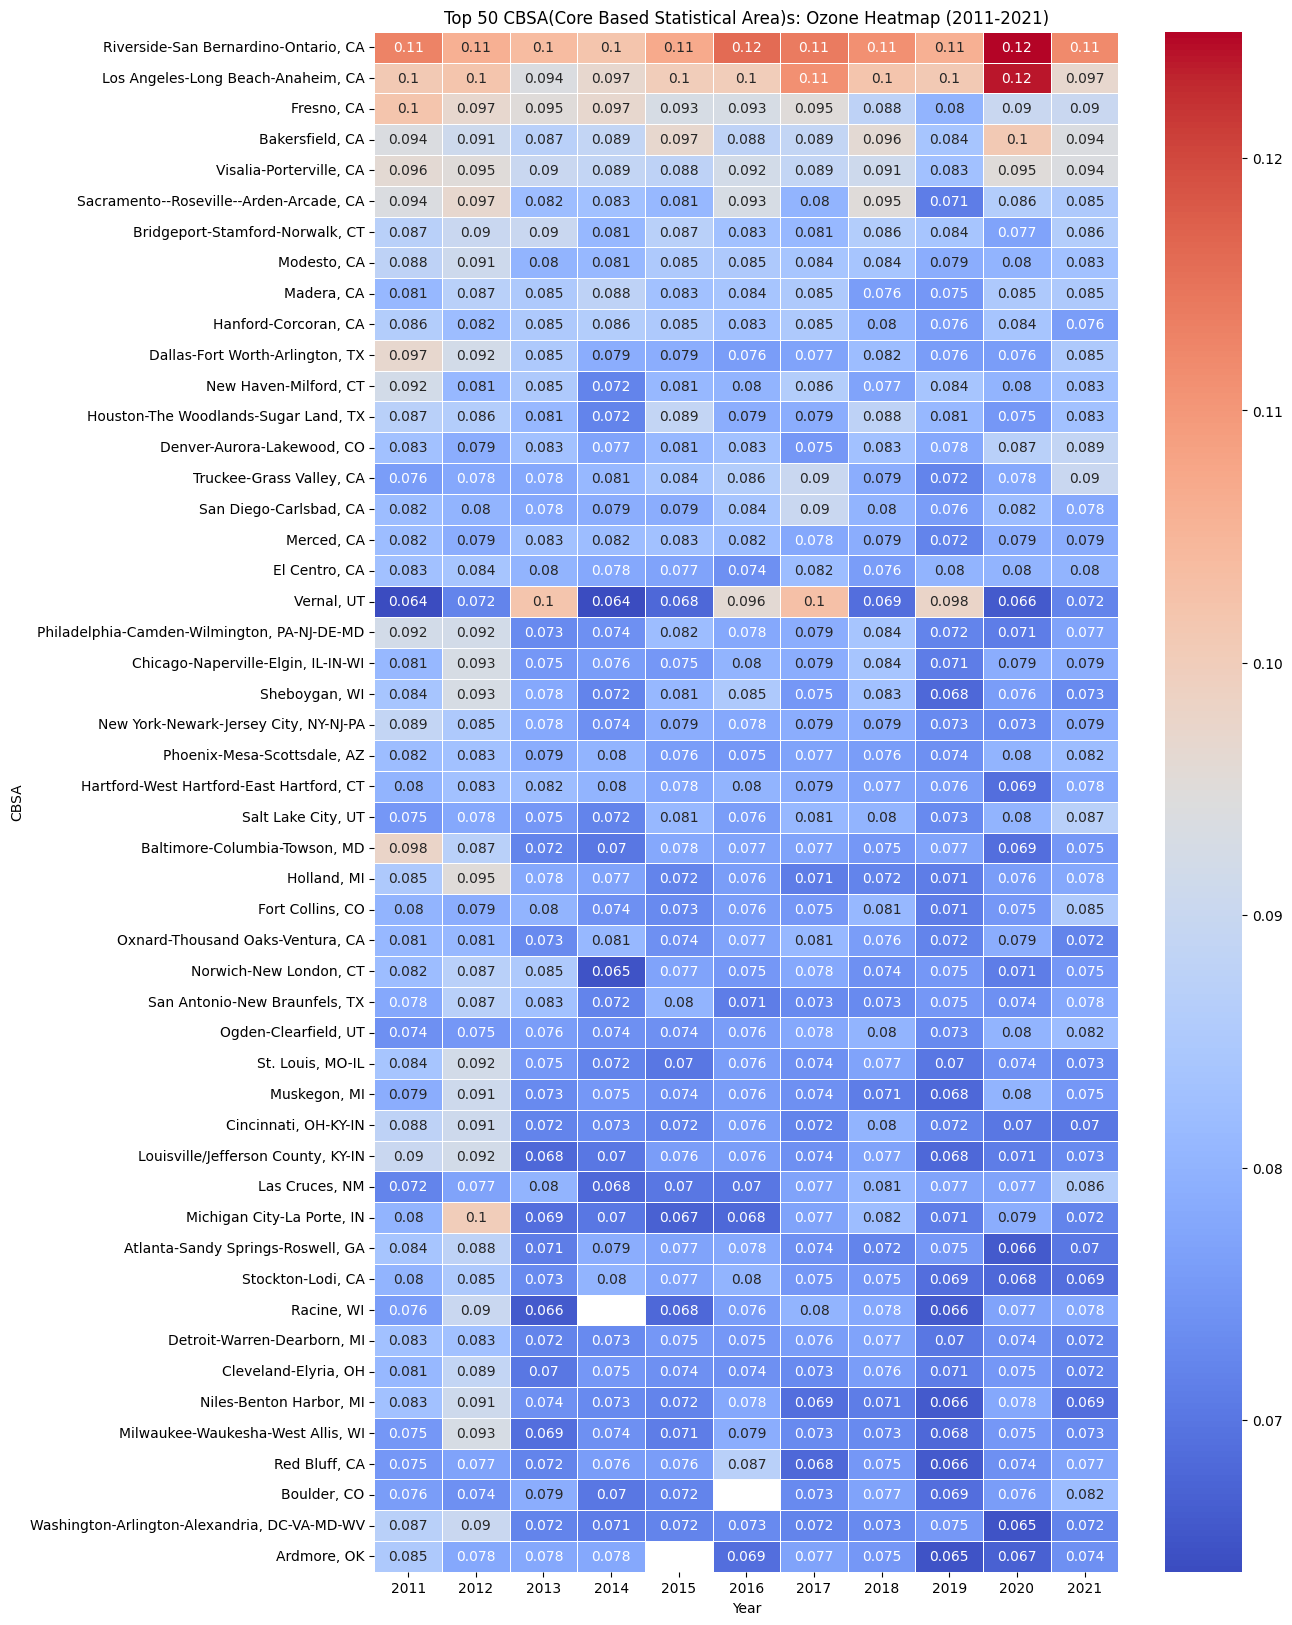

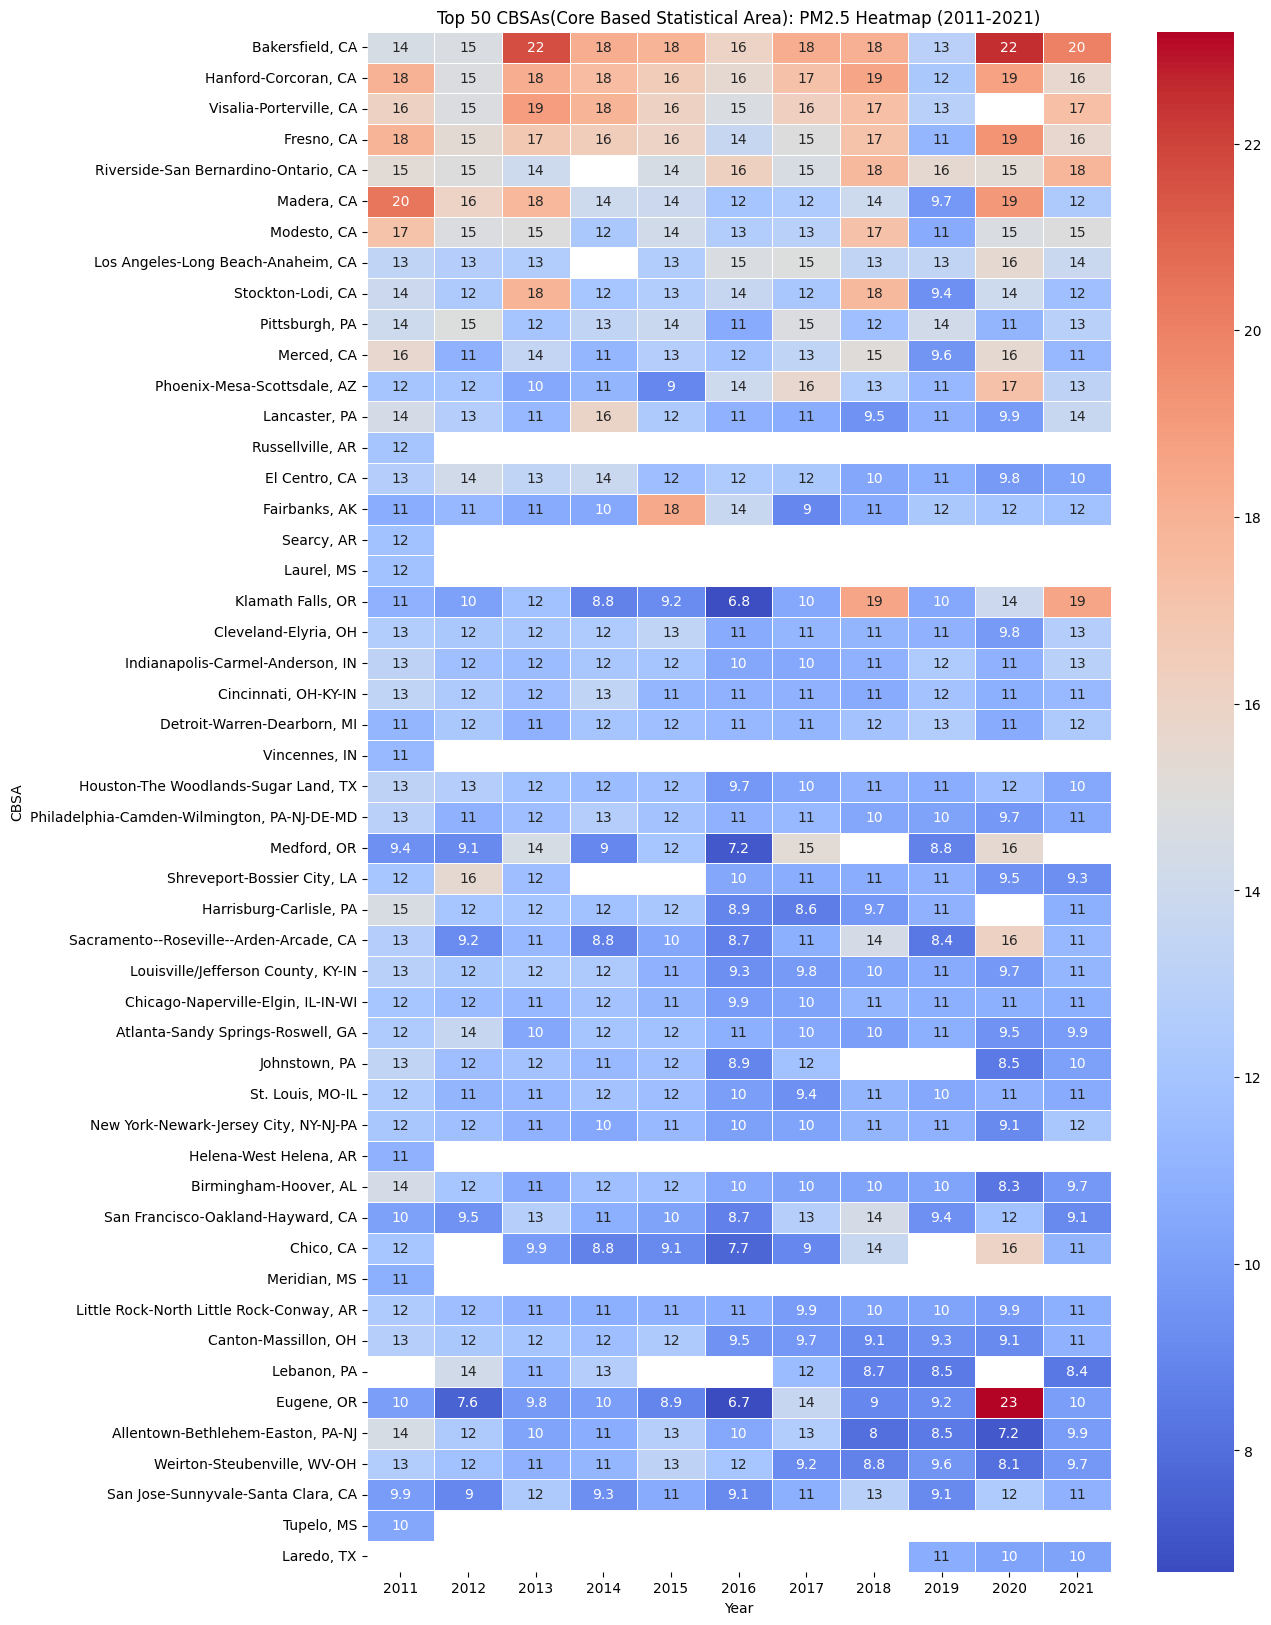

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(data, title):
    plt.figure(figsize=(12, 20))
    sns.heatmap(data, annot=True, cmap="coolwarm", linewidths=.5)
    plt.title(title)
    plt.show()

def get_top_cbsas(data, n=50):
    mean_by_cbsa = data.mean(axis=1).sort_values(ascending=False)
    top_cbsas = mean_by_cbsa.head(n).index
    return data.loc[top_cbsas]

no2_mean_heatmap_top50 = get_top_cbsas(no2_mean_heatmap)
ozone_max_heatmap_top50 = get_top_cbsas(ozone_max_heatmap)
pm25_weighted_mean_heatmap_top50 = get_top_cbsas(pm25_weighted_mean_heatmap)

plot_heatmap(no2_mean_heatmap_top50, 'Top 50 CBSA(Core Based Statistical Area)s: NO2 Heatmap (2011-2021)')
plot_heatmap(ozone_max_heatmap_top50, 'Top 50 CBSA(Core Based Statistical Area)s: Ozone Heatmap (2011-2021)')
plot_heatmap(pm25_weighted_mean_heatmap_top50, 'Top 50 CBSAs(Core Based Statistical Area): PM2.5 Heatmap (2011-2021)')
